In [28]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np
import cProfile

In [29]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [30]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)

21 18
wvfrm = 
l =  0  SNR =  12.700362978196573  m1 =  21  m2 =  18
18 26
wvfrm = 
l =  1  SNR =  10.890060619086425  m1 =  18  m2 =  26
29 29
wvfrm = 
l =  2  SNR =  39.71530293620477  m1 =  29  m2 =  29
18 11
wvfrm = 
l =  3  SNR =  13.68771769404325  m1 =  18  m2 =  11
14 18
wvfrm = 
l =  4  SNR =  23.858731571833804  m1 =  14  m2 =  18
28 20
wvfrm = 
l =  5  SNR =  44.01756894242468  m1 =  28  m2 =  20
12 21
wvfrm = 
l =  6  SNR =  28.574424188879387  m1 =  12  m2 =  21
27 30
wvfrm = 
l =  7  SNR =  13.366123367070767  m1 =  27  m2 =  30
19 14
wvfrm = 
l =  8  SNR =  24.6323838513914  m1 =  19  m2 =  14
18 10
wvfrm = 
l =  9  SNR =  12.455173056147292  m1 =  18  m2 =  10
12 10
wvfrm = 
l =  10  SNR =  10.11281951212487  m1 =  12  m2 =  10
19 25
wvfrm = 
l =  11  SNR =  35.069561408502345  m1 =  19  m2 =  25
22 12
wvfrm = 
l =  12  SNR =  10.05329774322951  m1 =  22  m2 =  12
16 14
wvfrm = 
l =  13  SNR =  8.477865909591792  m1 =  16  m2 =  14
24 22
wvfrm = 
l =  14  SNR =  19.8186

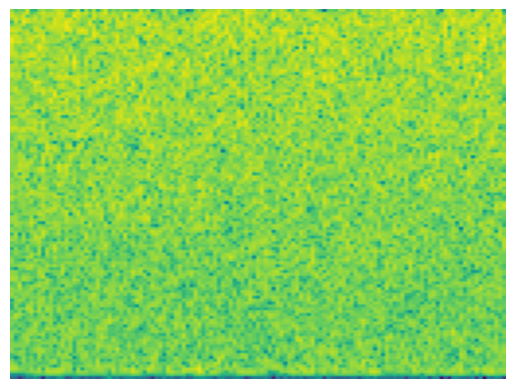

In [31]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:
    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)

    plt.savefig(
        f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
        bbox_inches="tight",
        pad_inches=0,
    )
    l += 1

In [32]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

11 18
wvfrm = 
l =  100  SNR =  7.07406733723335  m1 =  11  m2 =  18
26 12
wvfrm = 
l =  101  SNR =  10.962293523293937  m1 =  26  m2 =  12
22 23
wvfrm = 
l =  102  SNR =  21.306792137031294  m1 =  22  m2 =  23
24 23
wvfrm = 
l =  102  SNR =  29.856873549072542  m1 =  24  m2 =  23
30 17
wvfrm = 
l =  102  SNR =  35.330351381747285  m1 =  30  m2 =  17
27 22
wvfrm = 
l =  102  SNR =  13.671482915163592  m1 =  27  m2 =  22
24 22
wvfrm = 
l =  103  SNR =  13.505538427895893  m1 =  24  m2 =  22
23 11
wvfrm = 
l =  104  SNR =  36.80892075344568  m1 =  23  m2 =  11
15 12
wvfrm = 
l =  104  SNR =  19.705705876372647  m1 =  15  m2 =  12
26 29
wvfrm = 
l =  105  SNR =  15.14808100848443  m1 =  26  m2 =  29
21 15
wvfrm = 
l =  106  SNR =  17.57020757775901  m1 =  21  m2 =  15
13 26
wvfrm = 
l =  107  SNR =  11.444901612882761  m1 =  13  m2 =  26
23 13
wvfrm = 
l =  108  SNR =  10.544767647976183  m1 =  23  m2 =  13
10 24
wvfrm = 
l =  109  SNR =  7.2515164722753775  m1 =  10  m2 =  24
18 30
wvfrm

20 23
wvfrm = 
l =  200  SNR =  12.836402725105447  m1 =  20  m2 =  23
30 20
wvfrm = 
l =  201  SNR =  14.040170285097757  m1 =  30  m2 =  20
14 29
wvfrm = 
l =  202  SNR =  12.455307665773988  m1 =  14  m2 =  29
20 17
wvfrm = 
l =  203  SNR =  12.465760366342312  m1 =  20  m2 =  17
30 20
wvfrm = 
l =  204  SNR =  10.929024340624828  m1 =  30  m2 =  20
28 28
wvfrm = 
l =  205  SNR =  11.63792424408161  m1 =  28  m2 =  28
25 12
wvfrm = 
l =  206  SNR =  7.390085105446239  m1 =  25  m2 =  12
21 29
wvfrm = 
l =  207  SNR =  11.986069522198784  m1 =  21  m2 =  29
27 30
wvfrm = 
l =  208  SNR =  12.601408108956  m1 =  27  m2 =  30
12 10
wvfrm = 
l =  209  SNR =  8.286350079192369  m1 =  12  m2 =  10
24 10
wvfrm = 
l =  210  SNR =  8.502909376875035  m1 =  24  m2 =  10
21 24
wvfrm = 
l =  211  SNR =  12.956550505636867  m1 =  21  m2 =  24
25 29
wvfrm = 
l =  212  SNR =  13.493350554151094  m1 =  25  m2 =  29
29 26
wvfrm = 
l =  213  SNR =  14.012698976884863  m1 =  29  m2 =  26
11 22
wvfrm =

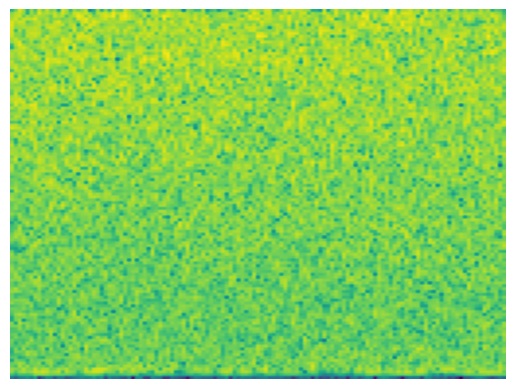

In [ ]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

28 10
wvfrm = 
l =  300  SNR =  7.873398619336211  m1 =  28  m2 =  10
22 25
wvfrm = 
l =  301  SNR =  10.279948563371295  m1 =  22  m2 =  25
16 30
wvfrm = 
l =  302  SNR =  10.620214982568978  m1 =  16  m2 =  30
15 15
wvfrm = 
l =  303  SNR =  8.743524847933742  m1 =  15  m2 =  15
30 27
wvfrm = 
l =  304  SNR =  14.913343820915204  m1 =  30  m2 =  27
19 29
wvfrm = 
l =  305  SNR =  12.230895968083635  m1 =  19  m2 =  29
10 15
wvfrm = 
l =  306  SNR =  7.043014566084477  m1 =  10  m2 =  15
26 23
wvfrm = 
l =  307  SNR =  11.55230533066867  m1 =  26  m2 =  23
20 13
wvfrm = 
l =  308  SNR =  10.88226297880166  m1 =  20  m2 =  13
30 11
wvfrm = 
l =  309  SNR =  11.011769307399979  m1 =  30  m2 =  11
30 19
wvfrm = 
l =  310  SNR =  13.386526425773722  m1 =  30  m2 =  19
20 27
wvfrm = 
l =  311  SNR =  14.70203546045266  m1 =  20  m2 =  27
30 30
wvfrm = 
l =  312  SNR =  17.797547131710477  m1 =  30  m2 =  30
30 22
wvfrm = 
l =  313  SNR =  11.6675483000559  m1 =  30  m2 =  22
18 25
wvfrm = 

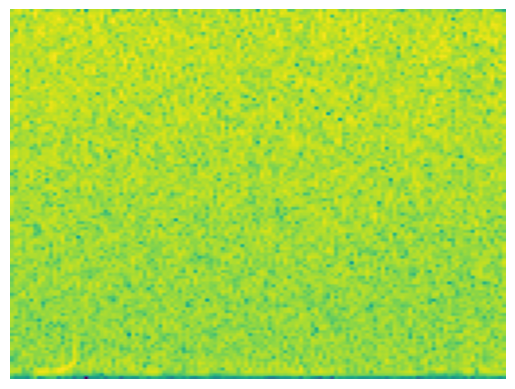

In [ ]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

22 25
wvfrm = 
l =  400  SNR =  17.3897682764116  m1 =  22  m2 =  25
21 20
wvfrm = 
l =  401  SNR =  11.166987460118388  m1 =  21  m2 =  20
23 19
wvfrm = 
l =  402  SNR =  16.207502230709913  m1 =  23  m2 =  19
19 30
wvfrm = 
l =  403  SNR =  9.419102718740804  m1 =  19  m2 =  30
11 12
wvfrm = 
l =  404  SNR =  6.803987773013766  m1 =  11  m2 =  12
26 30
wvfrm = 
l =  405  SNR =  14.393894167194897  m1 =  26  m2 =  30
28 30
wvfrm = 
l =  406  SNR =  13.833002726000489  m1 =  28  m2 =  30
25 24
wvfrm = 
l =  407  SNR =  14.283456724591076  m1 =  25  m2 =  24
14 24
wvfrm = 
l =  408  SNR =  9.015265005658454  m1 =  14  m2 =  24
24 15
wvfrm = 
l =  409  SNR =  12.559216301834176  m1 =  24  m2 =  15
19 29
wvfrm = 
l =  410  SNR =  11.909742886261915  m1 =  19  m2 =  29
23 21
wvfrm = 
l =  411  SNR =  13.776872305249167  m1 =  23  m2 =  21
14 23
wvfrm = 
l =  412  SNR =  11.76731081210381  m1 =  14  m2 =  23
20 25
wvfrm = 
l =  413  SNR =  12.241121095195767  m1 =  20  m2 =  25
20 17
wvfrm 

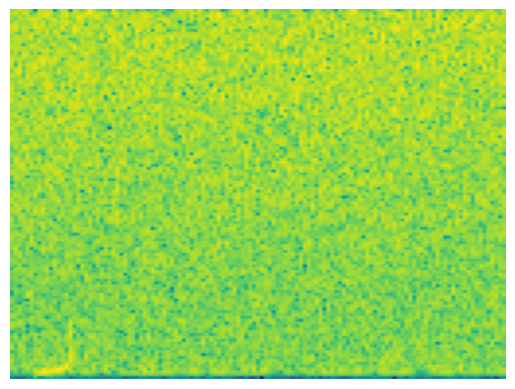

In [ ]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [ ]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 14
wvfrm = 
l =  500  SNR =  11.434718342664306  m1 =  25  m2 =  14
28 30
wvfrm = 
l =  501  SNR =  14.23253843037777  m1 =  28  m2 =  30
18 27
wvfrm = 
l =  502  SNR =  10.352358671161987  m1 =  18  m2 =  27
19 25
wvfrm = 
l =  503  SNR =  13.113902542009829  m1 =  19  m2 =  25
10 15
wvfrm = 
l =  504  SNR =  6.338018761008446  m1 =  10  m2 =  15
11 12
wvfrm = 
l =  505  SNR =  7.635540906926202  m1 =  11  m2 =  12
28 26
wvfrm = 
l =  506  SNR =  15.33896749428625  m1 =  28  m2 =  26
14 27
wvfrm = 
l =  507  SNR =  9.580009766031244  m1 =  14  m2 =  27
20 18
wvfrm = 
l =  508  SNR =  12.572846205059195  m1 =  20  m2 =  18
24 23
wvfrm = 
l =  509  SNR =  13.085337845339641  m1 =  24  m2 =  23
19 26
wvfrm = 
l =  510  SNR =  13.952257886164968  m1 =  19  m2 =  26
10 14
wvfrm = 
l =  511  SNR =  5.9032684509793585  m1 =  10  m2 =  14
21 22
wvfrm = 
l =  512  SNR =  15.309016039441687  m1 =  21  m2 =  22
10 21
wvfrm = 
l =  513  SNR =  6.219411720578001  m1 =  10  m2 =  21
26 30
wvfrm 

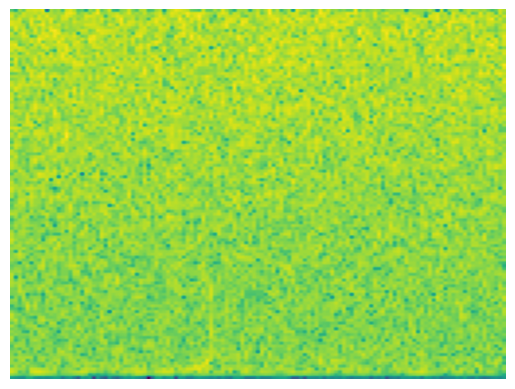

In [ ]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 27
wvfrm = 
l =  600  SNR =  12.185346601011622  m1 =  24  m2 =  27
28 28
wvfrm = 
l =  601  SNR =  13.67997340209358  m1 =  28  m2 =  28
19 20
wvfrm = 
l =  602  SNR =  11.110217175776038  m1 =  19  m2 =  20
20 28
wvfrm = 
l =  603  SNR =  13.278320044842461  m1 =  20  m2 =  28
30 18
wvfrm = 
l =  604  SNR =  14.513562071693778  m1 =  30  m2 =  18
24 21
wvfrm = 
l =  605  SNR =  13.986660688394302  m1 =  24  m2 =  21
25 27
wvfrm = 
l =  606  SNR =  16.439396657678376  m1 =  25  m2 =  27
18 16
wvfrm = 
l =  607  SNR =  8.122163931855034  m1 =  18  m2 =  16
19 11
wvfrm = 
l =  608  SNR =  9.002109996893951  m1 =  19  m2 =  11
13 27
wvfrm = 
l =  609  SNR =  13.241970789424487  m1 =  13  m2 =  27
29 15
wvfrm = 
l =  610  SNR =  8.842967061811777  m1 =  29  m2 =  15
22 16
wvfrm = 
l =  611  SNR =  10.15774063543435  m1 =  22  m2 =  16
10 15
wvfrm = 
l =  612  SNR =  6.488753269868249  m1 =  10  m2 =  15
10 22
wvfrm = 
l =  613  SNR =  8.244909379277727  m1 =  10  m2 =  22
20 19
wvfrm =

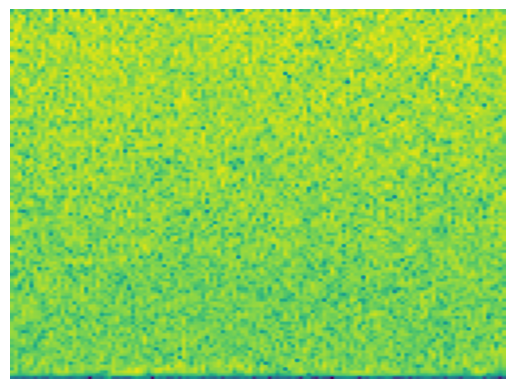

In [ ]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

21 15
wvfrm = 
l =  700  SNR =  7.082743070349424  m1 =  21  m2 =  15
15 12
wvfrm = 
l =  701  SNR =  10.627376732345608  m1 =  15  m2 =  12
29 12
wvfrm = 
l =  702  SNR =  11.05871324445229  m1 =  29  m2 =  12
11 11
wvfrm = 
l =  703  SNR =  8.550718404795692  m1 =  11  m2 =  11
17 28
wvfrm = 
l =  704  SNR =  10.063359869351814  m1 =  17  m2 =  28
18 27
wvfrm = 
l =  705  SNR =  10.91537380838823  m1 =  18  m2 =  27
24 20
wvfrm = 
l =  706  SNR =  8.53245275977959  m1 =  24  m2 =  20
11 20
wvfrm = 
l =  707  SNR =  8.355181334414574  m1 =  11  m2 =  20
29 23
wvfrm = 
l =  708  SNR =  12.438176315965078  m1 =  29  m2 =  23
10 22
wvfrm = 
l =  709  SNR =  11.254769441812702  m1 =  10  m2 =  22
12 11
wvfrm = 
l =  710  SNR =  8.906821215122308  m1 =  12  m2 =  11
16 11
wvfrm = 
l =  711  SNR =  10.255010635893441  m1 =  16  m2 =  11
20 11
wvfrm = 
l =  712  SNR =  10.60845617467909  m1 =  20  m2 =  11
17 11
wvfrm = 
l =  713  SNR =  8.480930464342675  m1 =  17  m2 =  11
20 27
wvfrm = 
l

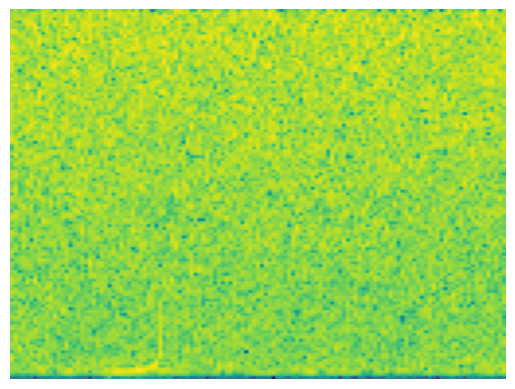

In [ ]:
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 20
wvfrm = 
l =  800  SNR =  10.667666161444718  m1 =  25  m2 =  20
24 26
wvfrm = 
l =  801  SNR =  16.39237377466379  m1 =  24  m2 =  26
13 19
wvfrm = 
l =  802  SNR =  7.090665993244901  m1 =  13  m2 =  19
15 15
wvfrm = 
l =  803  SNR =  10.176629798822908  m1 =  15  m2 =  15
18 20
wvfrm = 
l =  804  SNR =  6.295963583724328  m1 =  18  m2 =  20
29 24
wvfrm = 
l =  805  SNR =  16.09795775093141  m1 =  29  m2 =  24
19 11
wvfrm = 
l =  806  SNR =  10.242573579905583  m1 =  19  m2 =  11
12 14
wvfrm = 
l =  807  SNR =  6.1965881495213475  m1 =  12  m2 =  14
17 26
wvfrm = 
l =  808  SNR =  14.48156528139493  m1 =  17  m2 =  26
11 23
wvfrm = 
l =  809  SNR =  10.612846162489486  m1 =  11  m2 =  23
12 26
wvfrm = 
l =  810  SNR =  11.094639070783822  m1 =  12  m2 =  26
17 25
wvfrm = 
l =  811  SNR =  7.956654016467958  m1 =  17  m2 =  25
22 29
wvfrm = 
l =  812  SNR =  15.60409769210929  m1 =  22  m2 =  29
20 24
wvfrm = 
l =  813  SNR =  10.756629204168924  m1 =  20  m2 =  24
19 17
wvfrm =

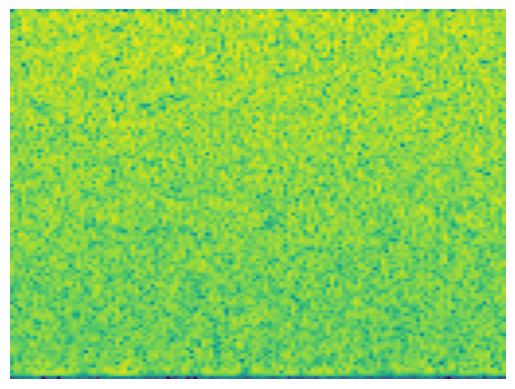

In [ ]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 17
wvfrm = 
l =  900  SNR =  12.207618774573435  m1 =  25  m2 =  17
22 19
wvfrm = 
l =  901  SNR =  10.861256938571136  m1 =  22  m2 =  19
27 15
wvfrm = 
l =  902  SNR =  10.246919253635713  m1 =  27  m2 =  15
17 28
wvfrm = 
l =  903  SNR =  13.63961610176467  m1 =  17  m2 =  28
22 12
wvfrm = 
l =  904  SNR =  6.29853481147602  m1 =  22  m2 =  12
17 15
wvfrm = 
l =  905  SNR =  11.35131747022194  m1 =  17  m2 =  15
12 19
wvfrm = 
l =  906  SNR =  6.951323467469777  m1 =  12  m2 =  19
17 21
wvfrm = 
l =  907  SNR =  9.915428323599983  m1 =  17  m2 =  21
18 13
wvfrm = 
l =  908  SNR =  7.862801262863334  m1 =  18  m2 =  13
20 27
wvfrm = 
l =  909  SNR =  11.729807982032163  m1 =  20  m2 =  27
20 22
wvfrm = 
l =  910  SNR =  13.37904556727759  m1 =  20  m2 =  22
17 27
wvfrm = 
l =  911  SNR =  8.524905553580615  m1 =  17  m2 =  27
20 10
wvfrm = 
l =  912  SNR =  7.97088193535015  m1 =  20  m2 =  10
13 28
wvfrm = 
l =  913  SNR =  9.500567172288191  m1 =  13  m2 =  28
27 30
wvfrm = 
l =

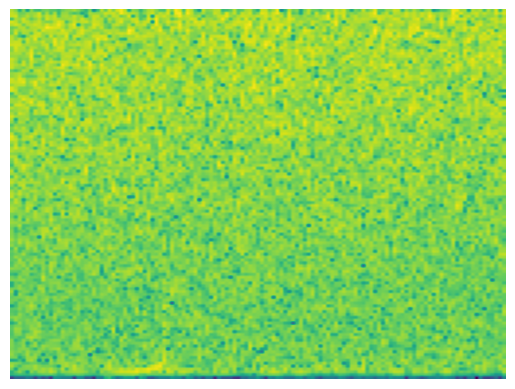

In [ ]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 29
wvfrm = 
l =  1000  SNR =  13.448005431546951  m1 =  10  m2 =  29
28 18
wvfrm = 
l =  1001  SNR =  12.079368015465713  m1 =  28  m2 =  18
17 30
wvfrm = 
l =  1002  SNR =  14.794084638144106  m1 =  17  m2 =  30
13 29
wvfrm = 
l =  1003  SNR =  10.90699892263276  m1 =  13  m2 =  29
17 13
wvfrm = 
l =  1004  SNR =  8.667886890982581  m1 =  17  m2 =  13
21 29
wvfrm = 
l =  1005  SNR =  10.336920289487473  m1 =  21  m2 =  29
18 14
wvfrm = 
l =  1006  SNR =  9.5583671422208  m1 =  18  m2 =  14
27 23
wvfrm = 
l =  1007  SNR =  13.384252335540378  m1 =  27  m2 =  23
13 23
wvfrm = 
l =  1008  SNR =  11.114800213238931  m1 =  13  m2 =  23
13 22
wvfrm = 
l =  1009  SNR =  9.149562895541973  m1 =  13  m2 =  22
22 18
wvfrm = 
l =  1010  SNR =  9.050071605381628  m1 =  22  m2 =  18
14 12
wvfrm = 
l =  1011  SNR =  9.751727372994875  m1 =  14  m2 =  12
29 23
wvfrm = 
l =  1012  SNR =  12.175330800907604  m1 =  29  m2 =  23
18 23
wvfrm = 
l =  1013  SNR =  15.117985734512175  m1 =  18  m2 =  23


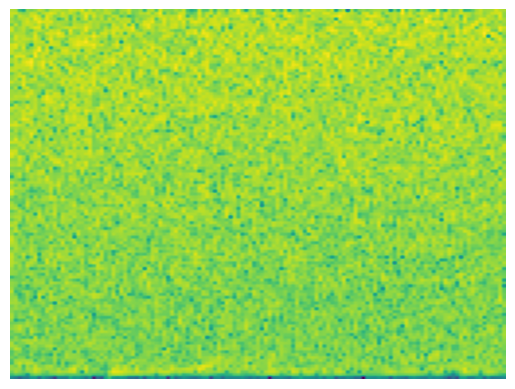

In [ ]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 14
wvfrm = 
l =  1100  SNR =  7.313519087498091  m1 =  24  m2 =  14
23 26
wvfrm = 
l =  1101  SNR =  13.069302722673562  m1 =  23  m2 =  26
16 13
wvfrm = 
l =  1102  SNR =  10.918178703788369  m1 =  16  m2 =  13
23 29
wvfrm = 
l =  1103  SNR =  13.96060152381009  m1 =  23  m2 =  29
28 24
wvfrm = 
l =  1104  SNR =  14.723476186417075  m1 =  28  m2 =  24
11 18
wvfrm = 
l =  1105  SNR =  7.201905677759966  m1 =  11  m2 =  18
10 27
wvfrm = 
l =  1106  SNR =  10.359104269531711  m1 =  10  m2 =  27
10 28
wvfrm = 
l =  1107  SNR =  10.40367440073245  m1 =  10  m2 =  28
20 23
wvfrm = 
l =  1108  SNR =  12.817287467746072  m1 =  20  m2 =  23
27 12
wvfrm = 
l =  1109  SNR =  11.287483516389903  m1 =  27  m2 =  12
14 30
wvfrm = 
l =  1110  SNR =  9.913220582918587  m1 =  14  m2 =  30
24 17
wvfrm = 
l =  1111  SNR =  8.432013184613584  m1 =  24  m2 =  17
13 15
wvfrm = 
l =  1112  SNR =  6.93013531633444  m1 =  13  m2 =  15
23 13
wvfrm = 
l =  1113  SNR =  9.717196057621097  m1 =  23  m2 =  13
3

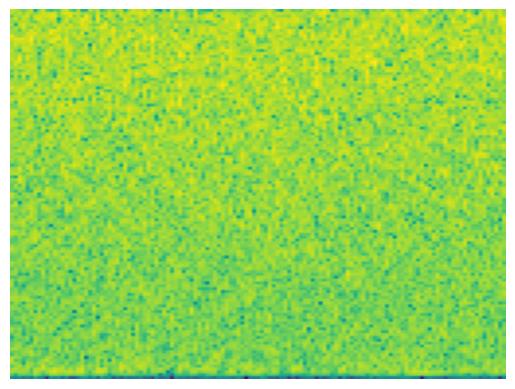

In [ ]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 14
wvfrm = 
l =  1200  SNR =  12.721194351001158  m1 =  25  m2 =  14
12 30
wvfrm = 
l =  1201  SNR =  10.853186967328908  m1 =  12  m2 =  30
18 10
wvfrm = 
l =  1202  SNR =  10.998707812450299  m1 =  18  m2 =  10
12 11
wvfrm = 
l =  1203  SNR =  7.3025840318985535  m1 =  12  m2 =  11
12 11
wvfrm = 
l =  1204  SNR =  4.733106035786957  m1 =  12  m2 =  11
24 17
wvfrm = 
l =  1204  SNR =  9.437792607508877  m1 =  24  m2 =  17
17 15
wvfrm = 
l =  1205  SNR =  8.452112372864862  m1 =  17  m2 =  15
16 19
wvfrm = 
l =  1206  SNR =  8.961712013753068  m1 =  16  m2 =  19
30 14
wvfrm = 
l =  1207  SNR =  13.69552829020921  m1 =  30  m2 =  14
30 12
wvfrm = 
l =  1208  SNR =  8.174213090464738  m1 =  30  m2 =  12
13 15
wvfrm = 
l =  1209  SNR =  6.16771842143362  m1 =  13  m2 =  15
17 27
wvfrm = 
l =  1210  SNR =  10.266501012775892  m1 =  17  m2 =  27
17 23
wvfrm = 
l =  1211  SNR =  8.278506407915769  m1 =  17  m2 =  23
15 13
wvfrm = 
l =  1212  SNR =  9.571801570768113  m1 =  15  m2 =  13
13

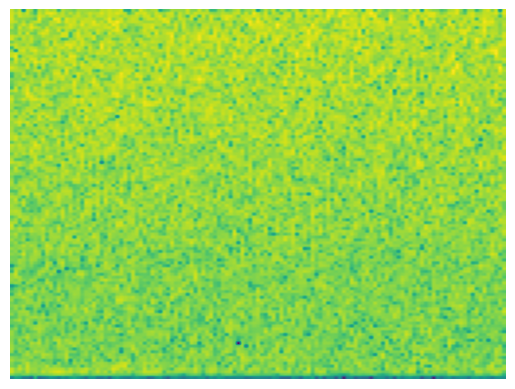

In [ ]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

21 10
wvfrm = 
l =  1300  SNR =  9.79811355653083  m1 =  21  m2 =  10
20 16
wvfrm = 
l =  1301  SNR =  9.069159694835664  m1 =  20  m2 =  16
16 21
wvfrm = 
l =  1302  SNR =  10.682929498107162  m1 =  16  m2 =  21
15 22
wvfrm = 
l =  1303  SNR =  9.353752832840081  m1 =  15  m2 =  22
28 10
wvfrm = 
l =  1304  SNR =  9.52358134114359  m1 =  28  m2 =  10
17 17
wvfrm = 
l =  1305  SNR =  8.44113381936198  m1 =  17  m2 =  17
17 30
wvfrm = 
l =  1306  SNR =  11.662778069624355  m1 =  17  m2 =  30
12 29
wvfrm = 
l =  1307  SNR =  10.797908113849564  m1 =  12  m2 =  29
10 13
wvfrm = 
l =  1308  SNR =  8.238929491057124  m1 =  10  m2 =  13
18 19
wvfrm = 
l =  1309  SNR =  10.703124718970695  m1 =  18  m2 =  19
20 27
wvfrm = 
l =  1310  SNR =  16.43698674446029  m1 =  20  m2 =  27
23 26
wvfrm = 
l =  1311  SNR =  15.852205626349642  m1 =  23  m2 =  26
19 19
wvfrm = 
l =  1312  SNR =  8.898071654555292  m1 =  19  m2 =  19
17 27
wvfrm = 
l =  1313  SNR =  12.536376673047625  m1 =  17  m2 =  27
17 

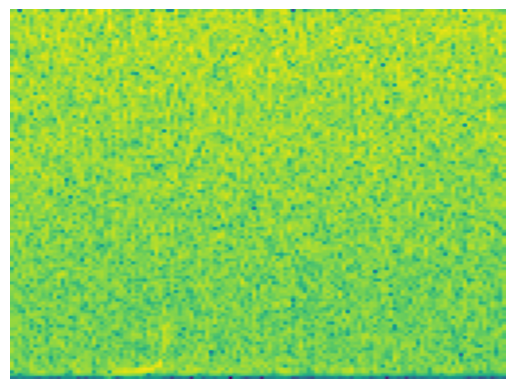

In [ ]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 16
wvfrm = 
l =  1400  SNR =  11.597307491659803  m1 =  24  m2 =  16
29 28
wvfrm = 
l =  1401  SNR =  18.584244656469625  m1 =  29  m2 =  28
10 24
wvfrm = 
l =  1402  SNR =  8.041850165358866  m1 =  10  m2 =  24
23 14
wvfrm = 
l =  1403  SNR =  10.130181863010383  m1 =  23  m2 =  14
24 11
wvfrm = 
l =  1404  SNR =  7.098267666508187  m1 =  24  m2 =  11
19 28
wvfrm = 
l =  1405  SNR =  9.429363502083488  m1 =  19  m2 =  28
25 25
wvfrm = 
l =  1406  SNR =  12.442636079441305  m1 =  25  m2 =  25
24 15
wvfrm = 
l =  1407  SNR =  14.493155046862666  m1 =  24  m2 =  15
15 28
wvfrm = 
l =  1408  SNR =  7.442768233206483  m1 =  15  m2 =  28
21 30
wvfrm = 
l =  1409  SNR =  14.342746238756522  m1 =  21  m2 =  30
15 20
wvfrm = 
l =  1410  SNR =  8.420433162124157  m1 =  15  m2 =  20
28 15
wvfrm = 
l =  1411  SNR =  10.439710332492314  m1 =  28  m2 =  15
26 17
wvfrm = 
l =  1412  SNR =  10.059902297801717  m1 =  26  m2 =  17
30 11
wvfrm = 
l =  1413  SNR =  11.822024245020593  m1 =  30  m2 =  

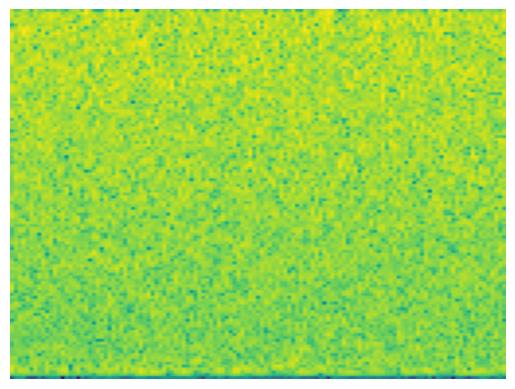

In [ ]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    random_scale = random.randint(500, 2900)
    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    # plotting
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if file_loc != 0:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/Signal_m1={m1}_m2={m2}_SNR={snr_peak}__{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
